# Analysis of Crop Cultivation in India

In [1]:
!pip install jovian opendatasets --upgrade --quiet

### Download the dataset

**The dataset_url1 is the dataset I created after data cleaning using MS-Excel**

In [2]:
dataset_url = 'https://www.kaggle.com/srinivas1/agricuture-crops-production-in-india'
dataset_url1 = 'https://www.kaggle.com/maithilibhakare/crop-cultivation-in-india'

Enter your username and key password of Kaggle account to download the dataset:
Steps to get the above details:
1. Visit www.kaggle.com 
2. Login to your account
3. Go to my Profile --> Account
4. Scroll Down till 'API'
5. Click 'Create New API Token'
5. .json file is downloaded
6. Copy the 'username' and 'key'

In [3]:
import opendatasets as od
od.download(dataset_url)
od.download(dataset_url1)
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline

Skipping, found downloaded files in "./agricuture-crops-production-in-india" (use force=True to force download)
Skipping, found downloaded files in "./crop-cultivation-in-india" (use force=True to force download)


In [4]:
data_dir='./agricuture-crops-production-in-india'

**The files are downloaded in agricuture-crops-production-in-india**

In [5]:
os.listdir(data_dir)

['produce.csv',
 'datafile.csv',
 'datafile (1).csv',
 'datafile (2).csv',
 'datafile (3).csv']

In [6]:
project_name = 'Crop Cultivation in India'

Our work is saved and uploaded to Jovian before continuing

In [7]:
!pip install jovian --upgrade --quiet

In [8]:
import jovian

In [9]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhakaremaithili/crop-cultivation-in-india" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhakaremaithili/crop-cultivation-in-india


'https://jovian.ai/bhakaremaithili/crop-cultivation-in-india'

## Agriculture in India:

![](https://agriculturalinformation4u.com/wp-content/uploads/2020/05/Modernization-of-Indian-Agriculture.jpg)

India ranks second in the world in farm outputs. As per 2018, agriculture employed more than 50% of the Indian work force and contributed 17–18% to country's GDP. A large population in India and the external demand is driving the growth of agriculture occupation

The dataset provides the insights of the crop cultivated in different regions in India. It also provides useful information of production and the farming area for each crop. The data is collected from the year 2001 - 2014. The data is downloaded from kaggle and it's origin is data.gov.in 

Lets have a look at the data and analyse it

In [10]:
cost_yield_crop = pd.read_csv('./agricuture-crops-production-in-india/datafile (1).csv')

In [11]:
cost_yield_crop.head(5)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


This data file constitues crops cultivated in each state, its Cultivation Cost, Production cost and yield 

## Data Preparation and Cleaning

In [12]:
cost_yield_crop.Crop.unique()

array(['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY',
       'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT'], dtype=object)

These are Crops that we will analyse

In [13]:
cost_yield_crop.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

Ths **'Cost price per hectare'**, **'Cultivation Cost per hectare'**, **'Yield in kg/hec'** is calculated below and merged with the **cost_yield_crop** dataframe

In [14]:
cost_yield_crop['Cost_price_phec'] = cost_yield_crop['Cost of Production (`/Quintal) C2'] * cost_yield_crop['Yield (Quintal/ Hectare) ']
cost_yield_crop['cultivation_cost_phec'] = cost_yield_crop['Cost of Cultivation (`/Hectare) A2+FL'] + cost_yield_crop['Cost of Cultivation (`/Hectare) C2']
cost_yield_crop['Yield_kghec'] = cost_yield_crop['Yield (Quintal/ Hectare) '] * 100

In [15]:
cost_yield_crop.head(5)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),Cost_price_phec,cultivation_cost_phec,Yield_kghec
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,19085.4365,32870.79,983.0
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,16228.2762,27121.83,747.0
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,18204.6970,33020.72,959.0
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,23564.8668,41223.31,642.0
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,24204.9760,42400.81,872.0


The new columns are added in the original dataframe

## Exploratory Data Analysis and Visualization

In [16]:
yield_sum_df=cost_yield_crop.groupby('Crop')[['Yield_kghec']].sum()

Here we are trying to calculate yield (kg/hec) of each crop

### 1. Which crop has the highest yield in India?

In [17]:
yield_sum_df

,Yield_kghec
Crop,
ARHAR,4203.0
COTTON,9386.0
GRAM,5279.0
GROUNDNUT,5144.0
MAIZE,15399.0
MOONG,2098.0
PADDY,23148.0
RAPESEED AND MUSTARD,7160.0
SUGARCANE,395248.0


In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhakaremaithili/crop-cultivation-in-india" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhakaremaithili/crop-cultivation-in-india


'https://jovian.ai/bhakaremaithili/crop-cultivation-in-india'

**Now, we will plot the Crop vs Yield pie chart using seaborn**

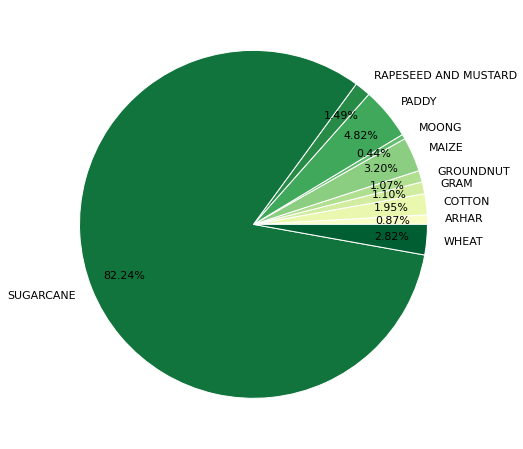

In [20]:
plt.figure(figsize=(8,8))
plt.pie(x=yield_sum_df['Yield_kghec'], labels=yield_sum_df.index, colors=sns.color_palette('YlGn', 10), wedgeprops={'linewidth':1, 'edgecolor':'white'}, textprops={'fontsize':11}, autopct='%.2f%%', pctdistance=0.8);

#### From the above chart, we can conclude that the SUGARCANE has maximum yield of 395248.0 quintal/hectare and MOONG has minimum yield of 2098.0 quintal/hectare followed by Paddy, Maize, Wheat, Cotton, Rapeseed and Mustard, Gram, Groundnut and Moong 

In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhakaremaithili/crop-cultivation-in-india" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhakaremaithili/crop-cultivation-in-india


'https://jovian.ai/bhakaremaithili/crop-cultivation-in-india'

### Lets see, state wise distribution of Yield of each crop

### 2. For each crop, which state has maximum yield?

In [23]:
cost_yield_crop.head(5)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),Cost_price_phec,cultivation_cost_phec,Yield_kghec
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,19085.4365,32870.79,983.0
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,16228.2762,27121.83,747.0
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,18204.6970,33020.72,959.0
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,23564.8668,41223.31,642.0
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,24204.9760,42400.81,872.0


Let us group by the data first by Crops and then State. Calculate the sum of Yield (kg/hec) and the values are sorted by Crop and Yield in ascending order

In [24]:
crop_state_yield_sum_df = cost_yield_crop.groupby(['Crop', 'State'])[['Yield_kghec']].sum().sort_values(by=(['Crop','Yield_kghec']), ascending=True)

**The table summarises crop cultivated in each state and it's yield**

In [25]:
crop_state_yield_sum_df

Yield_kghec
Crop                 State                      
ARHAR                Andhra Pradesh        642.0
                     Karnataka             747.0
                     Maharashtra           872.0
                     Gujarat               959.0
                     Uttar Pradesh         983.0
COTTON               Maharashtra          1269.0
                     Andhra Pradesh       1783.0
                     Gujarat              1905.0
                     Haryana              1990.0
                     Punjab               2439.0
GRAM                 Rajasthan             683.0
                     Maharashtra           805.0
                     Madhya Pradesh       1029.0
                     Uttar Pradesh        1093.0
                     Andhra Pradesh       1669.0
GROUNDNUT            Karnataka             471.0
                     Maharashtra           933.0
                     Andhra Pradesh       1197.0
                     Tamil Nadu           1198.0
                     Gujarat              1345.0
MAIZE                Uttar Pradesh        1370.0
                     Rajasthan            2356.0
                     Karnataka            3110.0
                     Andhra Pradesh       4268.0
                     Bihar                4295.0
MOONG                Karnataka             132.0
                     Orissa                301.0
                     Rajasthan             405.0
                     Andhra Pradesh        590.0
                     Maharashtra           670.0
PADDY                Orissa               3242.0
                     Uttar Pradesh        3661.0
                     West Bengal          3904.0
                     Andhra Pradesh       5600.0
                     Punjab               6741.0
RAPESEED AND MUSTARD Gujarat              1161.0
                     Madhya Pradesh       1294.0
                     Rajasthan            1354.0
                     Uttar Pradesh        1357.0
                     Haryana              1994.0
SUGARCANE            Uttar Pradesh       44889.0
                     Maharashtra         74401.0
                     Andhra Pradesh      75792.0
                     Karnataka           98621.0
                     Tamil Nadu         101545.0
WHEAT                Madhya Pradesh       2359.0
                     Uttar Pradesh        3499.0
                     Rajasthan            3719.0
                     Punjab               3983.0

In [26]:
import jovian

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhakaremaithili/crop-cultivation-in-india" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhakaremaithili/crop-cultivation-in-india


'https://jovian.ai/bhakaremaithili/crop-cultivation-in-india'

**Let us plot the pie diagram for each Crop and see the state wise distrbution of Yield (% of total yield of respective crop) by each state**

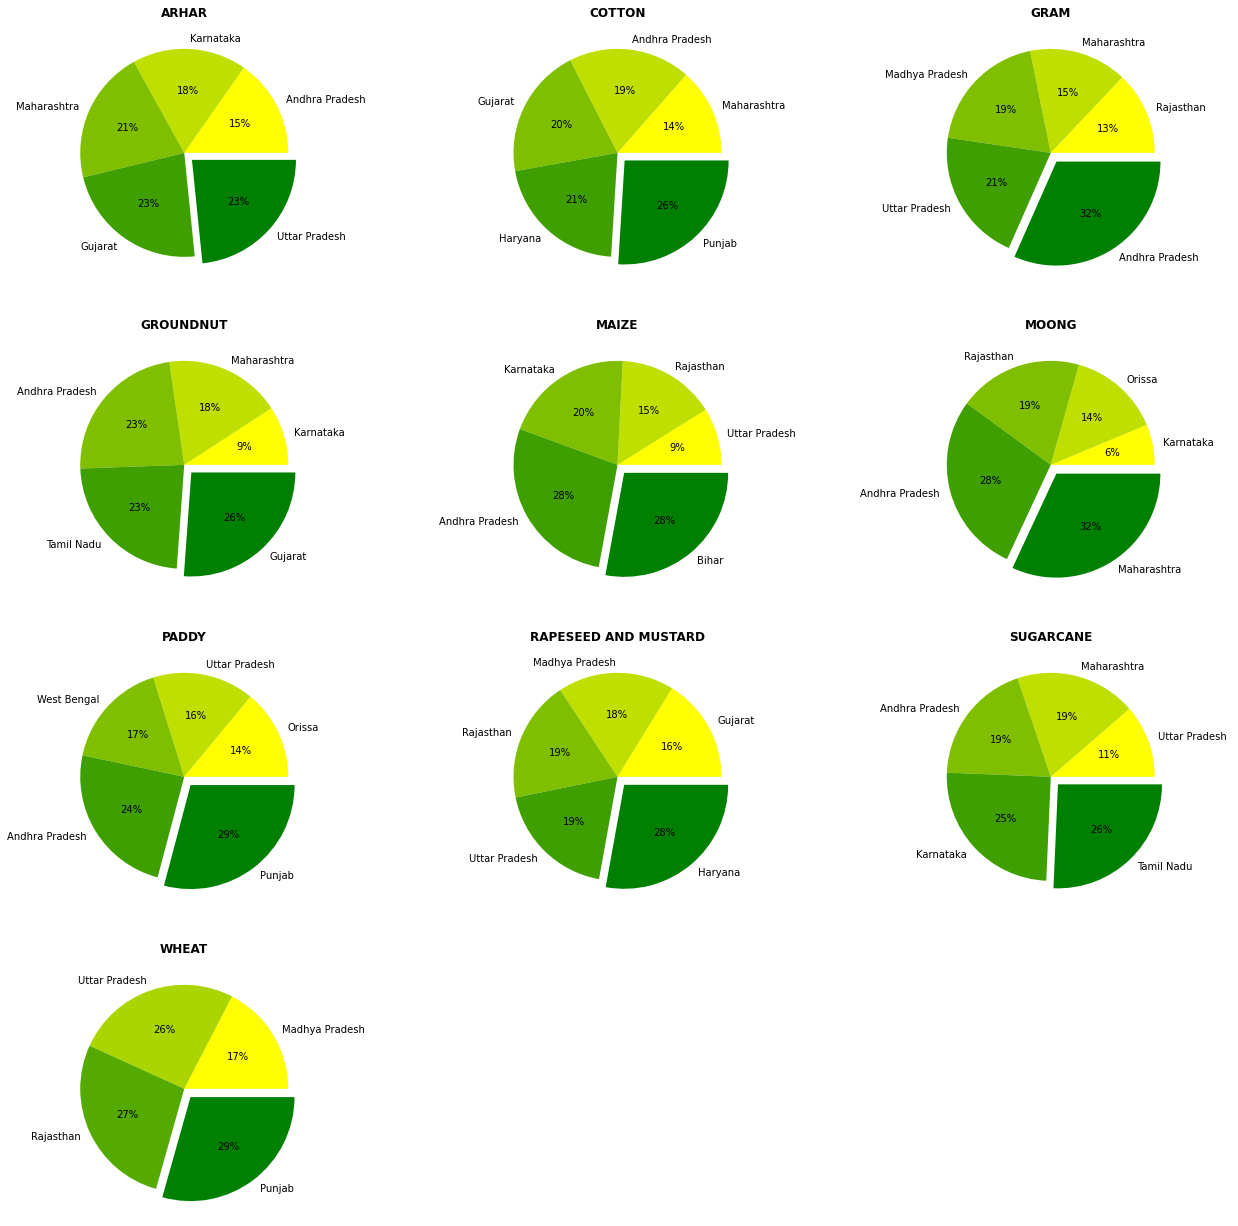

In [28]:
fig, axes = plt.subplots(4,3, figsize=(22,22))

Crop =[]
State =[]
Yield=[]
i=0
j=0
k=0

crops_list = cost_yield_crop.Crop.sort_values(ascending=True).unique()
for i in range(3):
    #print('i1=', i)
    j=0
    for j in range(3):
        #print('j1=', j)
        string = crops_list[k]
        b = crop_state_yield_sum_df.loc[string]
        highest = (np.array(b.Yield_kghec))
        #print(highest)
        length = len(highest)
        explode = (highest == max(highest))*0.1
        #print(explode)
        axes[i,j].pie(b.Yield_kghec, labels=b.index, autopct='%.0f%%', explode=explode, colors=sns.blend_palette(['yellow', 'green'], length))
        axes[i,j].set_title(string,fontweight='bold')
        highest_state = b['Yield_kghec'].idxmax()
        highest_yield = b['Yield_kghec'].max()
        Yield.append(highest_yield)
        State.append(highest_state)
        k+=1
        
        j+=1
    i+=1

wheat = crop_state_yield_sum_df.loc['WHEAT']
highest = (np.array(wheat.Yield_kghec))
length = len(highest)
explode = (highest == max(highest))*0.1
axes[3,0].pie(wheat.Yield_kghec, labels=wheat.index, autopct='%.0f%%', explode=explode, colors=sns.blend_palette(['yellow', 'green'], length))
axes[3,0].set_title('WHEAT',fontweight='bold')
highest_state = wheat['Yield_kghec'].idxmax()
highest_yield = wheat['Yield_kghec'].max()
Yield.append(highest_yield)
State.append(highest_state)

axes[3,1].axis('off')
axes[3,2].axis('off');

#### From the above pie diagrams, ARHAR has maximum yield in two states i.e. Uttar Pradesh, Gujarat. 
#### Punjab has maximum yield of Cotton, Paddy
#### Andhra Pradesh has maximum yield for Gram
#### Gujrat has maximum yield of Groundnut
#### Bihar has maximum yield of Maize
#### Maharashtra has maximum yield of Moong
#### Haryana has maximum yield of Rapeseed and Mustard
#### Tamil Nadu has maximum yield of Sugarcane

In [29]:
import jovian

In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhakaremaithili/crop-cultivation-in-india" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhakaremaithili/crop-cultivation-in-india


'https://jovian.ai/bhakaremaithili/crop-cultivation-in-india'

In [31]:
Crop = np.array(cost_yield_crop.Crop.unique())

In [32]:
crop_state_yield = pd.DataFrame({
    'Crop': Crop,
    'State': State,
    'Maximum_Yield': Yield
})

**The table below summarises the state with the maximum yield of each crop**

In [33]:
crop_state_yield

,Crop,State,Maximum_Yield
0,ARHAR,Uttar Pradesh,983.0
1,COTTON,Punjab,2439.0
2,GRAM,Andhra Pradesh,1669.0
3,GROUNDNUT,Gujarat,1345.0
4,MAIZE,Bihar,4295.0
5,MOONG,Maharashtra,670.0
6,PADDY,Punjab,6741.0
7,RAPESEED AND MUSTARD,Haryana,1994.0
8,SUGARCANE,Tamil Nadu,101545.0
9,WHEAT,Punjab,3983.0


Now let's have a look at other data and analyse it:

### 3. In each state, which crops has minimum cultivation cost, production cost and has maximum yield?

The table is first grouped by State and then crops. The cultivation cost per hectare, cost price per hectare and yield are added idividually for respective crop and tabulated in a dataframe. The data is sorted by state and Crop in ascending order

In [34]:
cost_state_crop = cost_yield_crop.groupby(['State', 'Crop'])[['cultivation_cost_phec', 'Cost_price_phec', 'Yield_kghec']].sum().sort_values(by = (['State','Crop']), ascending=True)
cost_state_crop

cultivation_cost_phec  Cost_price_phec  \
State          Crop                                                           
Andhra Pradesh ARHAR                              41223.31       23564.8668   
               COTTON                             73897.49       44753.1217   
               GRAM                               41184.07       26020.3776   
               GROUNDNUT                          51663.62       30582.2727   
               MAIZE                              63488.94       35875.9544   
               MOONG                              19893.50       13150.9230   
               PADDY                              76115.04       44234.4000   
               SUGARCANE                         148063.79       90738.1824   
Bihar          MAIZE                              33371.62       17370.2685   
Gujarat        ARHAR                              33020.72       18204.6970   
               COTTON                             71686.53       41514.9030   
               GROUNDNUT                          53065.73       25809.4740   
               RAPESEED AND MUSTARD               32824.19       18696.7440   
Haryana        COTTON                             73937.15       42334.2650   
               RAPESEED AND MUSTARD               42222.81       24947.3328   
Karnataka      ARHAR                              27121.83       16228.2762   
               GROUNDNUT                          30961.30       16409.6871   
               MAIZE                              34464.39       18090.5590   
               MOONG                              14309.28        7626.2736   
               SUGARCANE                         142421.21       85336.7513   
Madhya Pradesh GRAM                               26677.06       15969.4626   
               RAPESEED AND MUSTARD               26392.36       16558.0240   
               WHEAT                              34954.15       19113.7975   
Maharashtra    ARHAR                              42400.81       24204.9760   
               COTTON                             56828.26       32225.8743   
               GRAM                               31665.28       18335.3240   
               GROUNDNUT                          58762.12       29924.5755   
               MOONG                              26152.21       15150.3080   
               SUGARCANE                         143475.55       80025.7156   
Orissa         MOONG                              13750.52        7868.5614   
               PADDY                              43387.10       23181.5968   
Punjab         COTTON                             79875.93       48871.7064   
               PADDY                              70445.99       45155.2626   
               WHEAT                              53369.06       32055.1840   
Rajasthan      GRAM                               21163.54       11554.0378   
               MAIZE                              34231.75       15520.6212   
               MOONG                              15369.82        8378.1135   
               RAPESEED AND MUSTARD               30645.54       18161.0666   
               WHEAT                              48995.44       25422.3402   
Tamil Nadu     GROUNDNUT                          52901.52       28248.8400   
               SUGARCANE                         155360.33       87115.4555   
Uttar Pradesh  ARHAR                              32870.79       19085.4365   
               GRAM                               34451.47       20577.6924   
               MAIZE                              36680.54       19006.8320   
               PADDY                              45166.50       26821.2182   
               RAPESEED AND MUSTARD               35334.71       21651.7492   
               SUGARCANE                          69777.83       42034.0596   
               WHEAT                              50882.12       26936.7016   
West Bengal    PADDY                              57777.18       28548.0000   

       

**The table above summarises data for each crop state wise**

The color palette to highlight the bar of crop with minimum cultvation cost

In [35]:
def set_custom_palette(cult_series, cult_color = 'mediumseagreen', other_color = 'lightgreen'):
    cult_min_val = cult_series.min()
    cult_pal = []
    
    for cult_item in cult_series:
        if cult_item == cult_min_val:
            cult_pal.append(cult_color)
        else:
            cult_pal.append(other_color)
    return cult_pal

def set_custom_palette2(prod_series, prod_color='sandybrown', other_color = 'khaki'):
    prod_min_val = prod_series.min()
    prod_pal =[]
    
    for prod_item in prod_series:
        if prod_item == prod_min_val:
            prod_pal.append(prod_color)
        else:
            prod_pal.append(other_color)
    return prod_pal

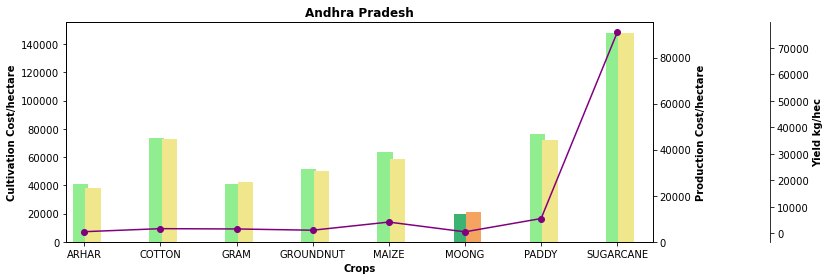

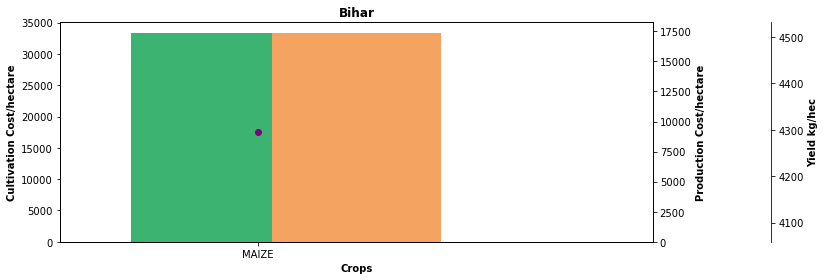

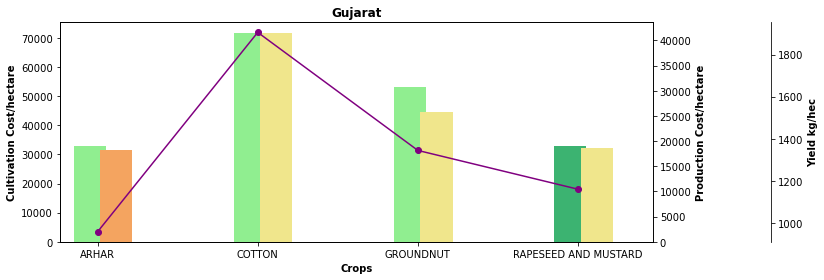

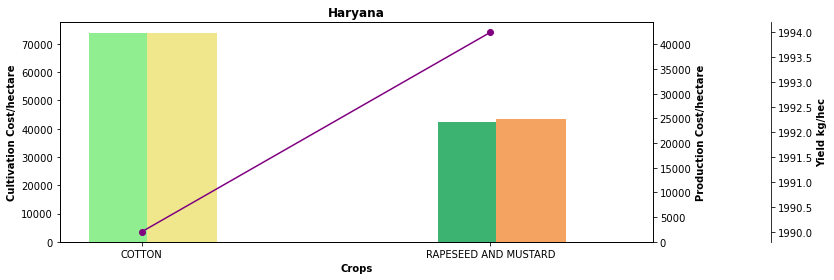

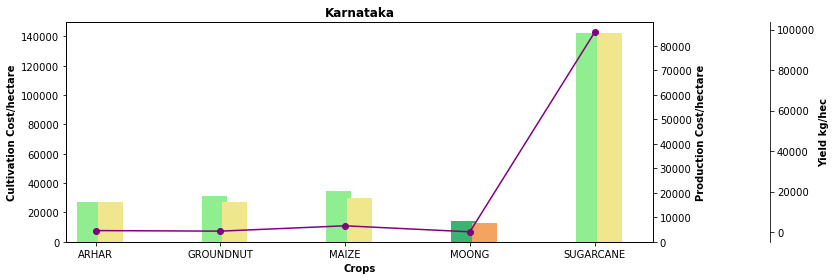

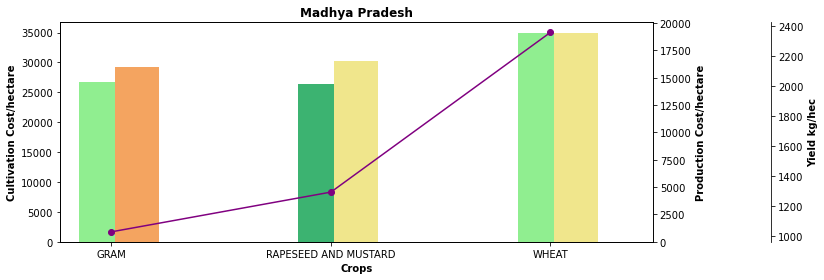

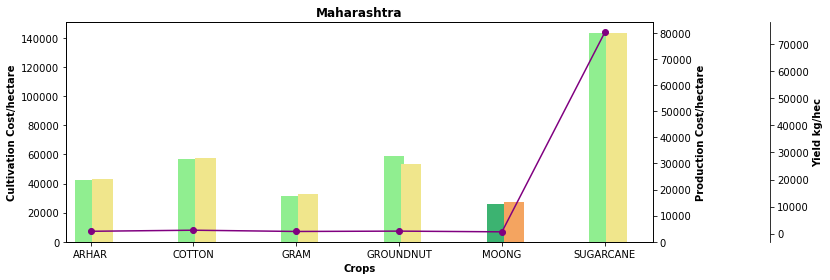

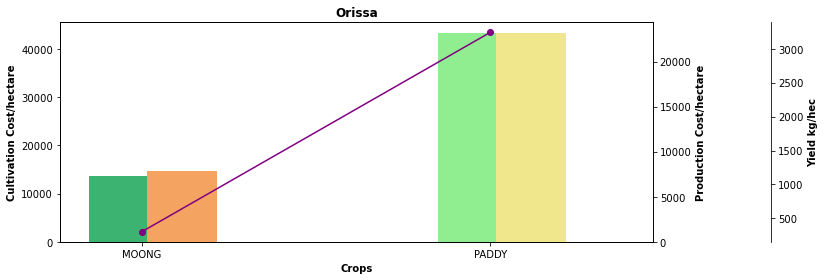

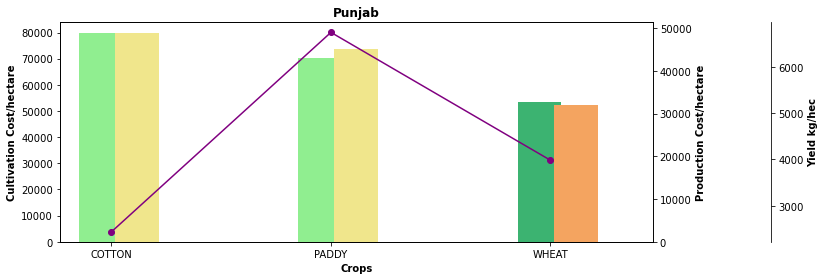

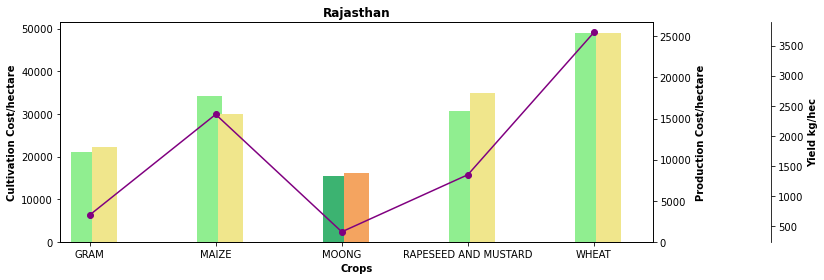

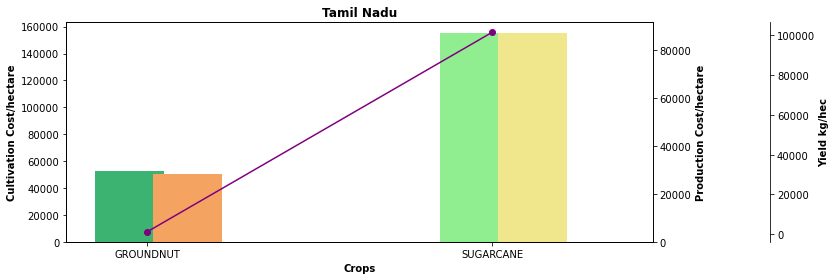

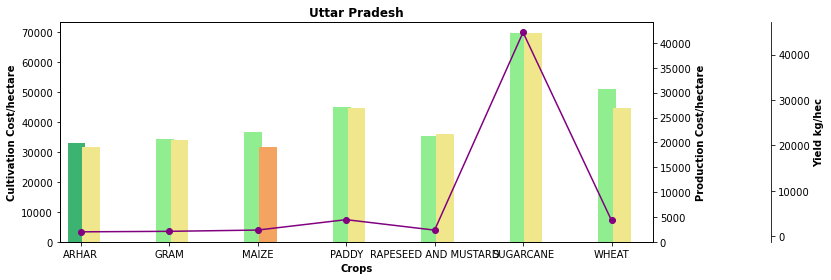

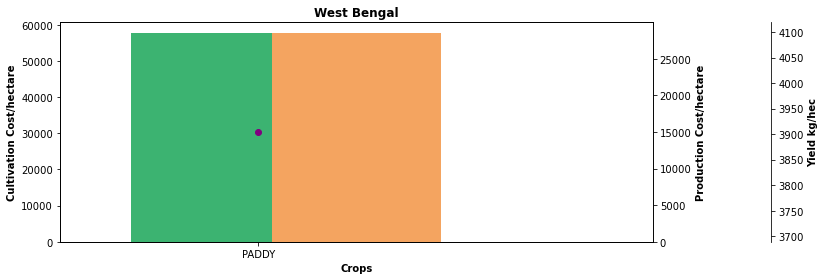

In [36]:
State = cost_yield_crop.State.sort_values(ascending=True).unique()
Crop_cultivation = []
Min_cult_cost = []
Crop_prod_cost = []
Min_prod_cost=[]
Yield_crop = []
Max_yield_crop = []

def three_axes(string):
    fig,ap_cult = plt.subplots(figsize = (10, 4))
    ap_prod = ap_cult.twinx()
    ap_yield = ap_cult.twinx()
    ap = cost_state_crop.loc[string]
    plt.title(string, fontweight='bold')
    low_cult = np.array(ap.cultivation_cost_phec)
    low_prod = np.array(ap.Cost_price_phec)
   # barWid = 0.25
   # r1 = np.arange(len(year))
   # r2 = [x + barWidth for x in r1]
   # r3 = [x + barWidth for x in r2]
    line1 = ap.cultivation_cost_phec.plot(kind='bar', ax=ap_cult, position=0.75, color=set_custom_palette(low_cult), label='Cultivation', width=0.2, rot=0)
    plt.tight_layout()
    ap_cult.set_xlabel('Crops', fontweight='bold')
    ap_cult.set_ylabel('Cultivation Cost/hectare', fontweight='bold')
    line2 = ap.Cost_price_phec.plot(kind='bar', ax=ap_prod, position=-0.08, color=set_custom_palette2(low_prod), label='Production', width = 0.2)
    ap_prod.set_ylabel('Production Cost/hectare', fontweight='bold')
    plt.tight_layout()

    ap_yield.spines['right'].set_position(("axes", 1.2))
    ap.Yield_kghec.plot(ax=ap_yield, label='Yield', color='purple', marker = 'o')
    ap_yield.set_ylabel('Yield kg/hec', fontweight='bold')

    lowest_cultivation_cost = ap['cultivation_cost_phec'].idxmin()
    Crop_cultivation.append(lowest_cultivation_cost)
    min_cult_cost = ap['cultivation_cost_phec'].min()
    Min_cult_cost.append(min_cult_cost)
    
    lowest_production_cost = ap['Cost_price_phec'].idxmin()
    Crop_prod_cost.append(lowest_production_cost)
    min_prod_cost = ap['Cost_price_phec'].min()
    Min_prod_cost.append(min_prod_cost)
    
    highest_yield_crop = ap['Yield_kghec'].idxmax()
    Yield_crop.append(highest_yield_crop)
    max_yield_crop = ap['Yield_kghec'].max()
    Max_yield_crop.append(max_yield_crop)

string = cost_yield_crop.State.sort_values(ascending=True).unique()
string
i=0
for i in range(13):
    three_axes(string[i])
    i+=1

In [37]:
min_prod_state_df= pd.DataFrame({
    'State': State,
    'Crop_with_min_Production_Cost' : Crop_prod_cost,
    'Cost_Price' : Min_prod_cost,
    'Crop_with_min_Cultivation_Cost' : Crop_cultivation,
    'Cultivation_Cost': Min_cult_cost,
    'Crop with maximum yield': Yield_crop,
    'Maximum Yield': Max_yield_crop
})

min_prod_state_df

,State,Crop_with_min_Production_Cost,Cost_Price,Crop_with_min_Cultivation_Cost,Cultivation_Cost,Crop with maximum yield,Maximum Yield
0,Andhra Pradesh,MOONG,13150.9230,MOONG,19893.50,SUGARCANE,75792.0
1,Bihar,MAIZE,17370.2685,MAIZE,33371.62,MAIZE,4295.0
2,Gujarat,ARHAR,18204.6970,RAPESEED AND MUSTARD,32824.19,COTTON,1905.0
3,Haryana,RAPESEED AND MUSTARD,24947.3328,RAPESEED AND MUSTARD,42222.81,RAPESEED AND MUSTARD,1994.0
4,Karnataka,MOONG,7626.2736,MOONG,14309.28,SUGARCANE,98621.0
5,Madhya Pradesh,GRAM,15969.4626,RAPESEED AND MUSTARD,26392.36,WHEAT,2359.0
6,Maharashtra,MOONG,15150.3080,MOONG,26152.21,SUGARCANE,74401.0
7,Orissa,MOONG,7868.5614,MOONG,13750.52,PADDY,3242.0
8,Punjab,WHEAT,32055.1840,WHEAT,53369.06,PADDY,6741.0
9,Rajasthan,MOONG,8378.1135,MOONG,15369.82,WHEAT,3719.0


**Andhra Pradesh** farmers cultivate Moong with minimum cultivation cost, production cost but Sugarcane of type Co-0218 has maximum yield.

**Bihar** cultivates 'Maize' with minimum cultivation cost, production cost and also maximum yield under Kharif season

**Gujarat** cultivates 'Arhar' with minimum cultivation cost and 'Rapeseed and Mustard' with minimum production cost under timely sown irrigated condition but 'Cotton' of type VBCH2231 has maximum yield when cultivated under rainfed condition.

**Haryana** cultivates 'Rapeseed and Mustard' with minimum cultivation, production cost and also maximum yield. Indian Mustard of type DRMR601 (NRCDR 601) is cultivated under timely sown irrigated condition and type Pusa Mustard 26(NPJ-113) is grown in multiple cropping system.

**Karnataka** cultivates 'Moong' with minimum cultivation cost, production cost and 'Sugarcane' of type Co-0218 has maximum yield

**Madhya Pradesh** cultivates 'Gram' under irrigated condition with minimum cultivation cost. 'Rapeseed and Mustard' where Indian Mustard of type Pusa Mustard 27(EJ-17) has minimum production cost and grown in multiple cropping system. 'Wheat' of type MPO(JW)1215 (MPO 1215) has maximum yield

**Maharashtra** cultivates 'Moong' with minimum cultivation cost, production cost and 'Sugarcane' of type Co-0218 has maximum yield

**Orissa** cultivates 'Moong' with minimum cultivation cost, production cost. 'Paddy' of type Chinsurah Rice (IET 19140) under irrigated condition, type IGKVR-1 (IET 19569) under both irrigated and rainfed conditions has maximum yield

**Punjab** cultivates 'Wheat' of type PDW 314, WHD 943 under timely sown irrigated conditions with minimum cultivation cost, production cost. 'Paddy' has maximum yield

**Rajasthan** cultivates 'Moong' with minimum cultivation cost, production cost. 'Wheat' of type MPO(JW)1215 (MPO 1215) cultivated under timely sown irrigated condition, PDW 314 are grown everywhere excluding Kota and Udaipur divisions has maximum yield

**Tamil Nadu** cultivates 'Groundnut' with minimum cultivation cost, production cost and 'Sugarcane' of type Co-0218 has maximum yield

**Uttar Pradesh** cultivates 'Maize' of type HQPM-4 in Kharif season inj West & Central regions with minimum cultivation cost, 'Arhar' with production cost and 'Sugarcane' has maximum yield

**West Bengal** cultivates 'Rapeseed and Mustard' with minimum cultivation, production cost and also maximum yield

In [38]:
import jovian

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhakaremaithili/crop-cultivation-in-india" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhakaremaithili/crop-cultivation-in-india


'https://jovian.ai/bhakaremaithili/crop-cultivation-in-india'

#### Lets have a look at another file datafile (2).csv

In [40]:
datafile2 = pd.read_csv('./agricuture-crops-production-in-india/datafile (2).csv')

In [41]:
datafile2.head(5)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


The loaded file consists data of Production, Area, Yield from 2006-2011 for each crop

In [42]:
datafile2.columns

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [43]:
datafile2_highest_df = pd.DataFrame(columns=['Category', 'Figure', 'Crop'])
col_list = datafile2.columns
crops_list1 = np.array(datafile2['Crop             '])
for i in range(1,16):
    highest_prod = np.array(datafile2[col_list[i]]).max()
    highest_crop = (datafile2[col_list[i]]).idxmax()
    datafile2_highest_df = datafile2_highest_df.append({'Category':col_list[i], 'Figure':highest_prod, 'Crop': crops_list1[highest_crop]}, ignore_index=True)

datafile2_highest_df

,Category,Figure,Crop
0,Production 2006-07,1427.7,Total Spices
1,Production 2007-08,1571.5,Total Spices
2,Production 2008-09,1463.0,Total Spices
3,Production 2009-10,1430.3,Total Spices
4,Production 2010-11,1790.6,Total Spices
5,Area 2006-07,222.7,Soyabean
6,Area 2007-08,241.6,Garlic
7,Area 2008-09,254.5,Soyabean
8,Area 2009-10,260.3,Soyabean
9,Area 2010-11,314.7,Onion


**From the above table, we see that highest production and yield for the years 2006-2011 is achieved by Total Species. Along with this the file contains data of Total Foodgrains, Total Pulses, Total Oilseeds, etc. That restricts us in knowing the specific crop. Hence, I used Excel to clean the data. And the required excel files can be downloaded as below:**

### Load area_year.csv, prod_year.csv, yield_year.csv file

In [44]:
crop_area_year = pd.read_csv('./crop-cultivation-in-india/area_year.csv')
crop_prod_year = pd.read_csv('./crop-cultivation-in-india/prod_year.csv')
crop_yield_year = pd.read_csv('./crop-cultivation-in-india/yield_year.csv')

**The table below summarises Area in hectare sq for the years 2006 to 2011**

In [45]:
crop_area_year.head(5)

,Crop,2006-07,2007-08,2008-09,2009-10,2010-11
0,Rice,168.5,168.9,175.1,161.2,164.8
1,Wheat,115.0,115.2,114.0,116.9,119.5
2,Jowar,120.7,110.6,107.3,111.0,105.2
3,Bajra,94.5,95.1,87.0,88.5,95.6
4,Maize,156.1,160.5,161.6,163.4,169.1


**The table below summarises production in /quintal for the years 2006 to 2011**

In [46]:
crop_prod_year.head()

,Crop,2006-07,2007-08,2008-09,2009-10,2010-11
0,Rice,200.8,207.9,213.3,191.6,206.4
1,Wheat,131.6,136.4,140.1,140.3,150.8
2,Jowar,124.3,137.8,126.0,116.5,121.8
3,Bajra,136.4,161.5,143.9,105.4,167.9
4,Maize,198.8,249.6,259.8,220.1,286.0


**The table below summarises Yield (kg/hec) from 2006-2011 for each crop**

In [47]:
crop_yield_year.head()

,Crop,2006-07,2007-08,2008-09,2009-10,2010-11
0,Rice,119.2,123.1,121.8,118.9,125.2
1,Wheat,114.4,118.4,122.8,120.0,126.3
2,Jowar,103.0,124.6,117.4,105.0,115.8
3,Bajra,144.3,169.7,165.4,119.0,175.8
4,Maize,127.3,155.5,160.7,134.7,169.1


In [48]:
import jovian

In [49]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhakaremaithili/crop-cultivation-in-india" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhakaremaithili/crop-cultivation-in-india


'https://jovian.ai/bhakaremaithili/crop-cultivation-in-india'

## Data Cleaning 

The column names are extracted

In [50]:
years = np.array(crop_area_year.columns[1:])
years

array(['2006-07', '2007-08', '2008-09', '2009-10', '2010-11'],
      dtype=object)

The column name is renamed for convinience

In [51]:
crop_area_year.rename(columns = {'Crop             ':'Crops'}).head()

,Crops,2006-07,2007-08,2008-09,2009-10,2010-11
0,Rice,168.5,168.9,175.1,161.2,164.8
1,Wheat,115.0,115.2,114.0,116.9,119.5
2,Jowar,120.7,110.6,107.3,111.0,105.2
3,Bajra,94.5,95.1,87.0,88.5,95.6
4,Maize,156.1,160.5,161.6,163.4,169.1


## Exploratory Data analysis and Visualization

### 4. How does land area, production and yield used for cultivation of each crop vary from 2006-2011? 

The code to plot grouped bar plot is written using calling function command

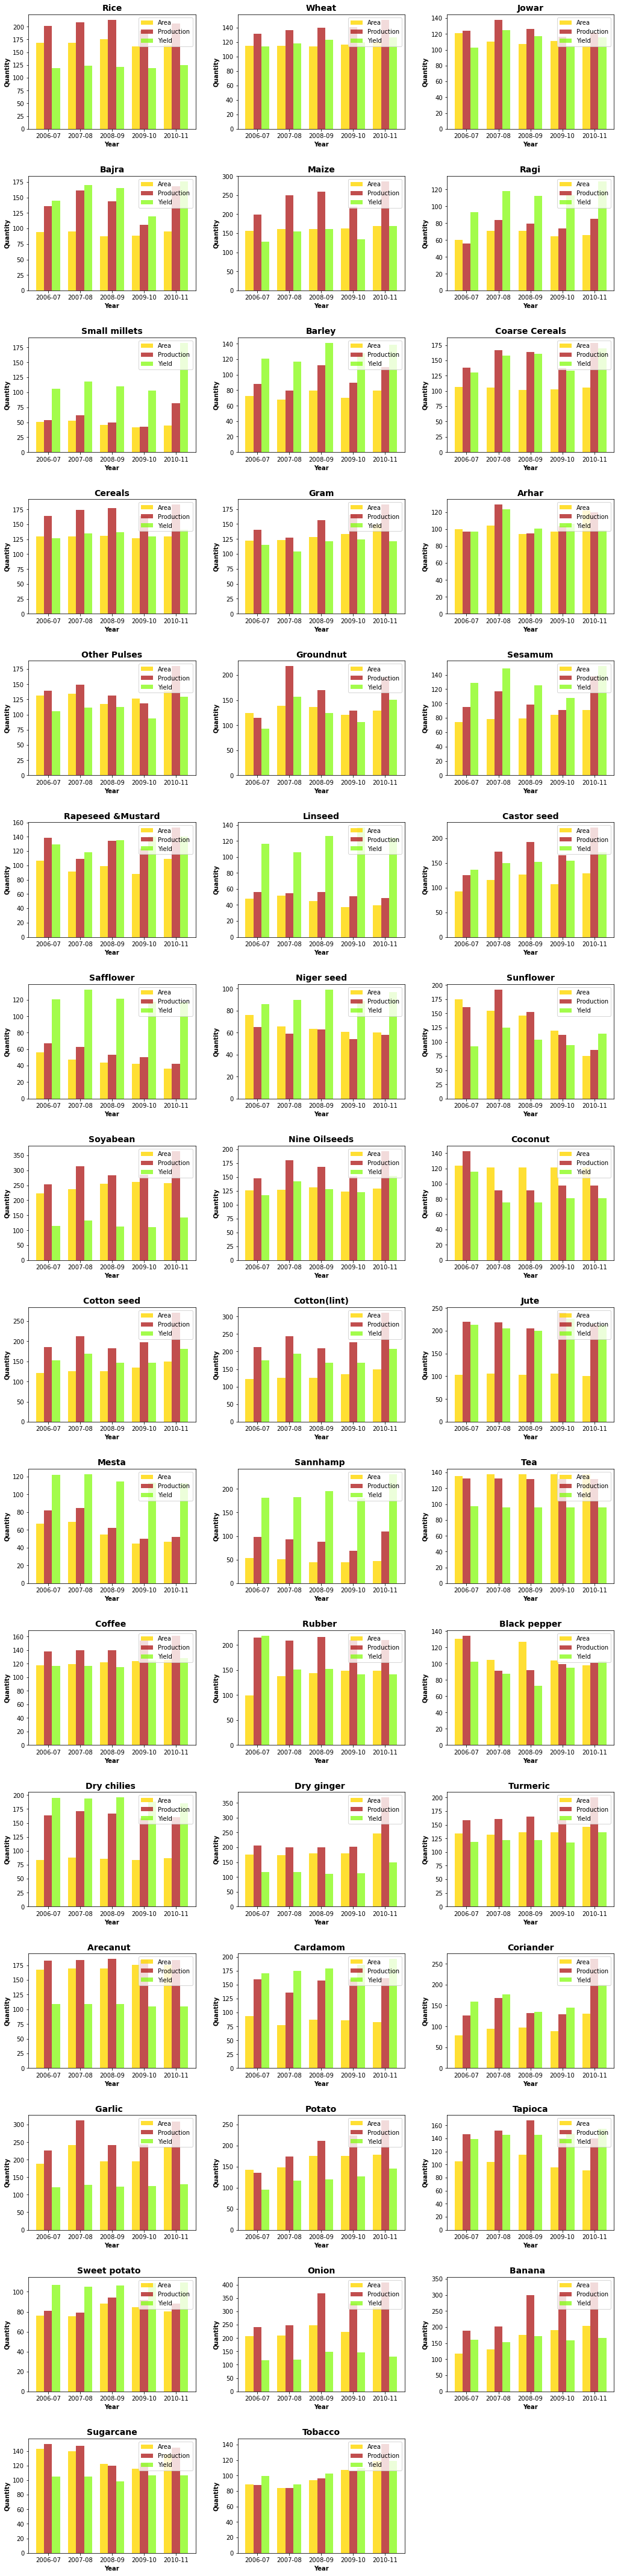

In [52]:
#sns.set_theme()
fig, axes = plt.subplots(16,3, figsize=(15,60))
j=0
k=0
i=0
#for i in range(5):
    
for j in range(15):
    for k in range(3):
        #print('j =',j)
        #print ('k=',k)
        
        #print('i=',i)
        a = crop_area_year.iloc[i]
        b= crop_prod_year.iloc[i]
        c = crop_yield_year.iloc[i]
        
        year = a.index[1:]
        area = a[1],a[2],a[3],a[4],a[5]
        prod = b[1], b[2], b[3], b[4], b[5]
        yields = c[1], c[2], c[3], c[4], c[5]
        
        barWidth = 0.25
        r1 = np.arange(len(year))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]
        
        axes[j,k].bar(r1, area, color="gold", width = barWidth, label='Area', alpha=0.8)
        axes[j,k].bar(r2, prod, color='firebrick', width = barWidth,  label='Production', alpha=0.8)
        axes[j,k].bar(r3, yields, color='lawngreen', width = barWidth, label = 'Yield', alpha=0.7)
        axes[j,k].set_ylabel('Quantity', fontweight='bold')
        axes[j,k].set_xlabel('Year', fontweight='bold')
        axes[j,k].set_title(a[0], fontweight='bold', fontsize=14)
        axes[j,k].set_xticks(r1+barWidth)
        axes[j,k].set_xticklabels(year)
        axes[j,k].legend(loc=1)
        fig.tight_layout(pad=3.0)
        k+=1
        i+=1
        
    j+=1
a = crop_area_year.iloc[45]
b= crop_prod_year.iloc[45]
c = crop_yield_year.iloc[45]
        
year = a.index[1:]
area = a[1],a[2],a[3],a[4],a[5]
prod = b[1], b[2], b[3], b[4], b[5]
yields = c[1], c[2], c[3], c[4], c[5]
        
barWidth = 0.25
r1 = np.arange(len(year))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
axes[15,0].bar(r1, area, color="gold", width = barWidth, label='Area', alpha=0.8)
axes[15,0].bar(r2, prod, color='firebrick', width = barWidth,  label='Production', alpha=0.8)
axes[15,0].bar(r3, yields, color='lawngreen', width = barWidth, label = 'Yield', alpha=0.7)
axes[15,0].set_ylabel('Quantity', fontweight='bold')
axes[15,0].set_xlabel('Year', fontweight='bold')
axes[15,0].set_title(a[0], fontweight='bold', fontsize=14)
axes[15,0].set_xticks(r1+barWidth)
axes[15,0].set_xticklabels(year)
axes[15,0].legend(loc=1)
fig.tight_layout(pad=3.0)

a = crop_area_year.iloc[46]
b= crop_prod_year.iloc[46]
c = crop_yield_year.iloc[46]
        
year = a.index[1:]
area = a[1],a[2],a[3],a[4],a[5]
prod = b[1], b[2], b[3], b[4], b[5]
yields = c[1], c[2], c[3], c[4], c[5]
        
barWidth = 0.25
r1 = np.arange(len(year))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
axes[15,1].bar(r1, area, color="gold", width = barWidth, label='Area', alpha=0.8)
axes[15,1].bar(r2, prod, color='firebrick', width = barWidth,  label='Production', alpha=0.8)
axes[15,1].bar(r3, yields, color='lawngreen', width = barWidth, label = 'Yield', alpha=0.7)
axes[15,1].set_ylabel('Quantity', fontweight='bold')
axes[15,1].set_xlabel('Year', fontweight='bold')
axes[15,1].set_title(a[0], fontweight='bold', fontsize=14)
axes[15,1].set_xticks(r1+barWidth)
axes[15,1].set_xticklabels(year)
axes[15,1].legend(loc=1)
fig.tight_layout(pad=3.0)

axes[15,2].axis('off');

### 5. For every year, which crop has max/min area, production, yield?

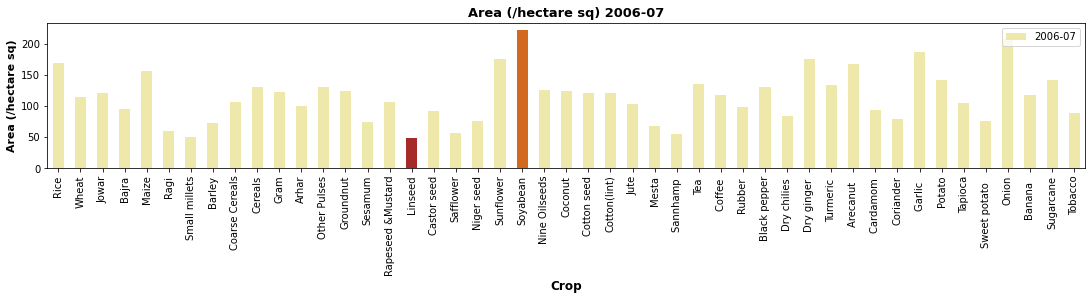

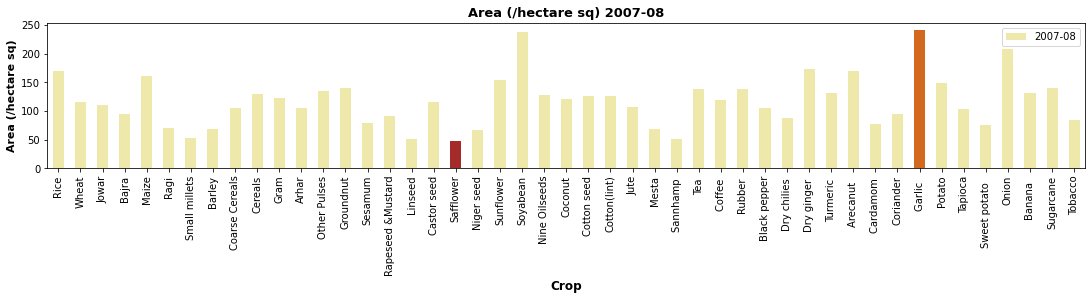

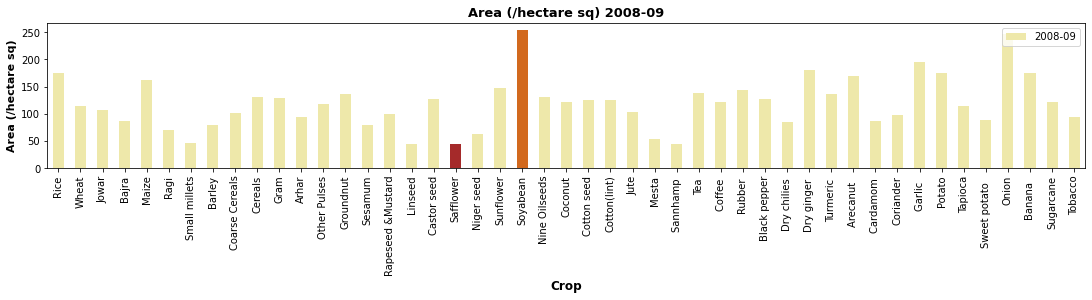

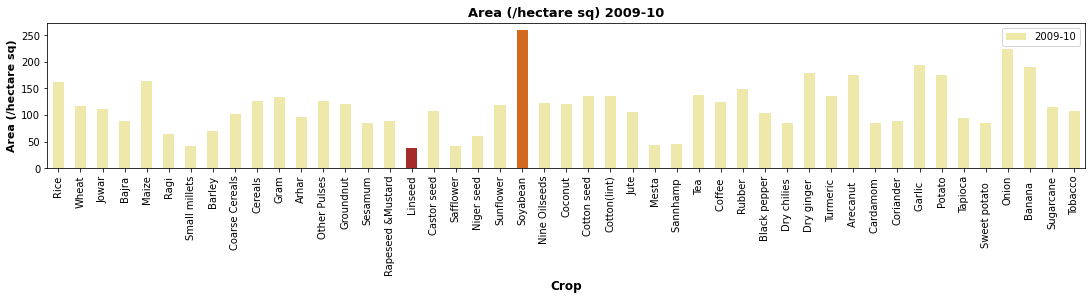

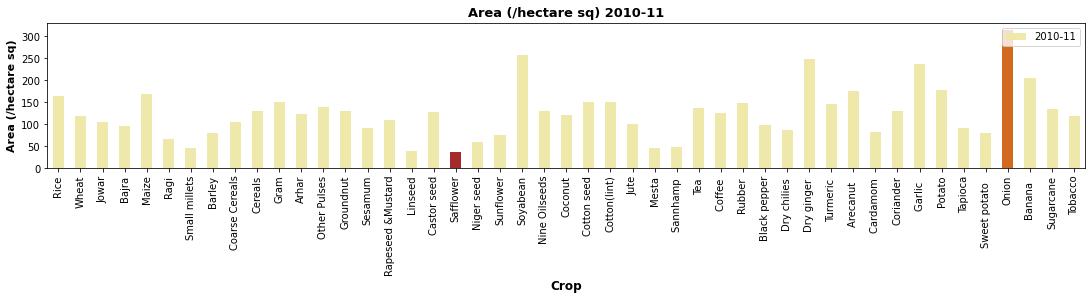

In [53]:
def set_custom_palette3(series, high_color='chocolate', other_color = 'palegoldenrod', low_color='brown'):
    max_val = series.max()
    min_val = series.min()
    pal =[]
    
    for item in series:
        if item == max_val:
            pal.append(high_color)
        elif item == min_val:
            pal.append(low_color)
        else:
            pal.append(other_color)
    return pal

for i in range(1,6):
    plt.rcParams["figure.figsize"] = (15,4)
    high = np.array(crop_area_year[crop_area_year.columns[i]])
    crop_area_year.plot.bar(crop_area_year.columns[0], crop_area_year.columns[i], color=set_custom_palette3(high))
    plt.ylabel('Area (/hectare sq)', fontsize=11, fontweight='bold')
    plt.xlabel('Crop', fontsize=12, fontweight='bold')
    plt.title('Area (/hectare sq) {}' .format(crop_area_year.columns[i]), fontsize=13, fontweight='bold')
    plt.legend(loc=1)
    plt.tight_layout(pad=0.1)
    i+=1

**2006-07** Highest area for Soyabeen and lowest area for Lineseed

**2007-08** Highest area for Garlic and lowest area for Safflower

**2008-09** Highest area for Soyabeen and lowest area for Safflower

**2009-10** Highest area for Soyabeen and lowest area for Lineseed

**2010-11** Highest area for Onion and lowest area for Safflower

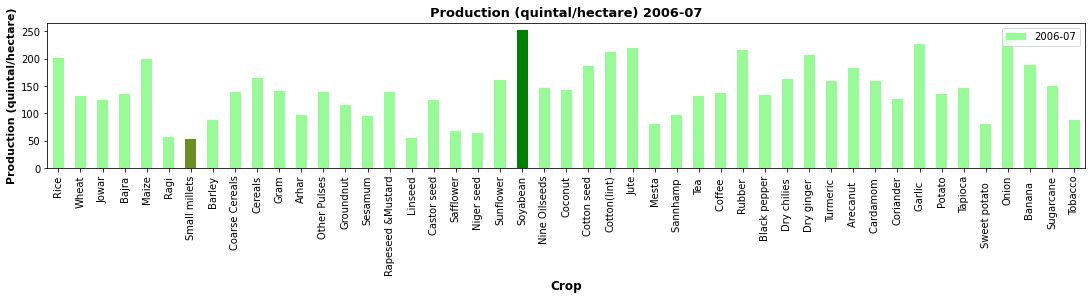

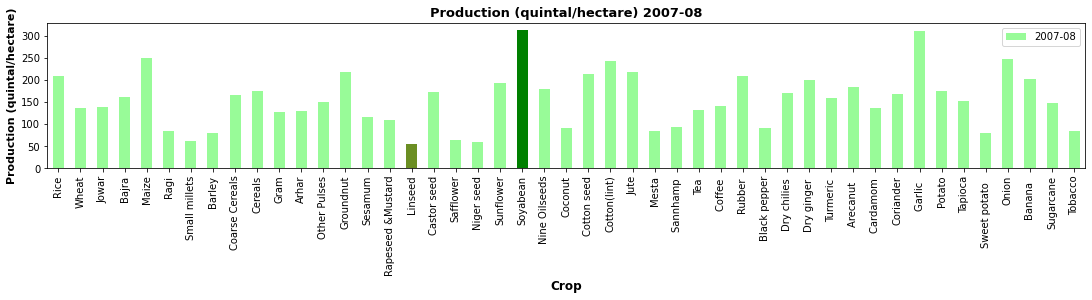

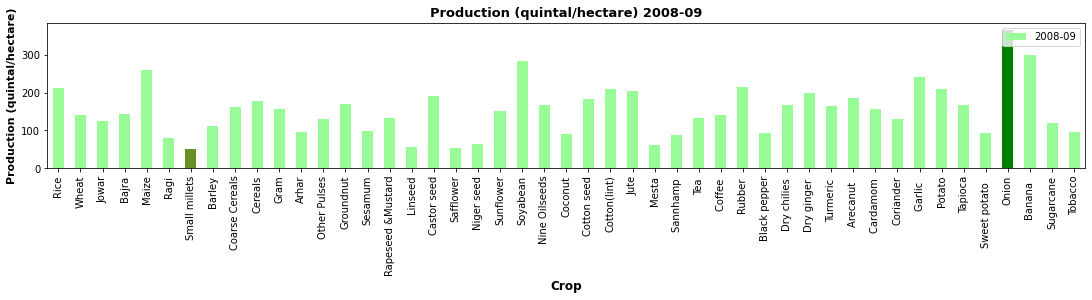

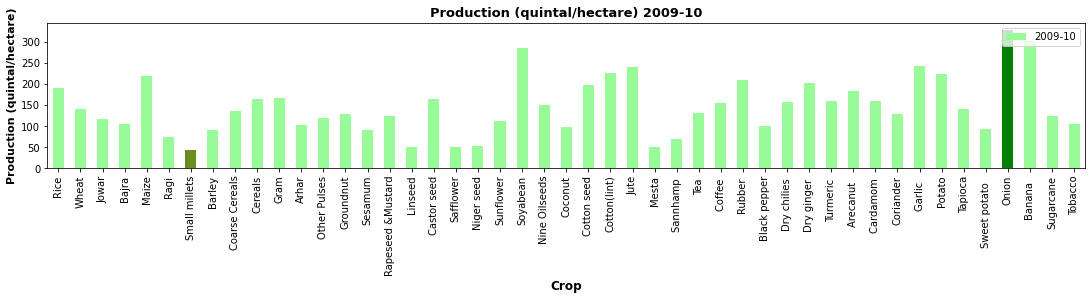

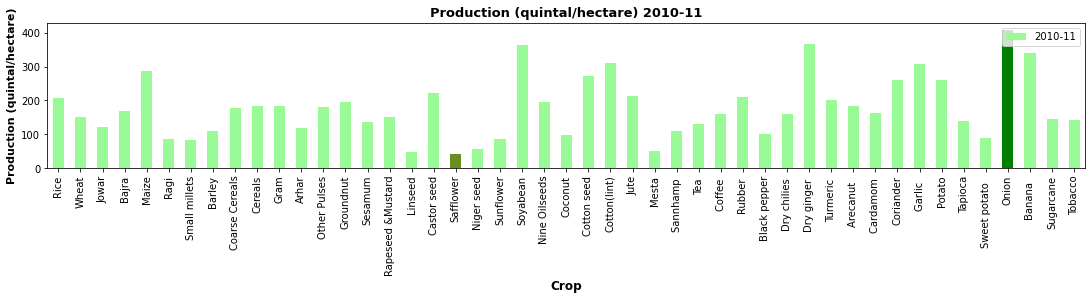

In [54]:
def set_custom_palette4(series, high_color='g', other_color = 'palegreen', low_color='olivedrab'):
    max_val = series.max()
    min_val = series.min()
    pal =[]
    
    for item in series:
        if item == max_val:
            pal.append(high_color)
        elif item == min_val:
            pal.append(low_color)
        else:
            pal.append(other_color)
    return pal

for i in range(1,6):
    plt.rcParams["figure.figsize"] = (15,4)
    high = np.array(crop_prod_year[crop_prod_year.columns[i]])
    crop_prod_year.plot.bar(crop_prod_year.columns[0], crop_prod_year.columns[i], color=set_custom_palette4(high))
    plt.ylabel('Production (quintal/hectare)', fontsize=11, fontweight='bold')
    plt.xlabel('Crop', fontsize=12, fontweight='bold')
    plt.title('Production (quintal/hectare) {}' .format(crop_prod_year.columns[i]), fontsize=13, fontweight='bold')
    plt.legend(loc=1)
    plt.tight_layout(pad=0.1)
    i+=1

**2006-07** Highest production for Soyabeen and lowest production for Small millets

**2007-08** Highest production for Soyabeen and lowest production for Lineseed

**2008-09** Highest production for Onion and lowest production for Small millets

**2009-10** Highest production for Onion and lowest production for Small millets

**2010-11** Highest production for Onion and lowest production for Safflower

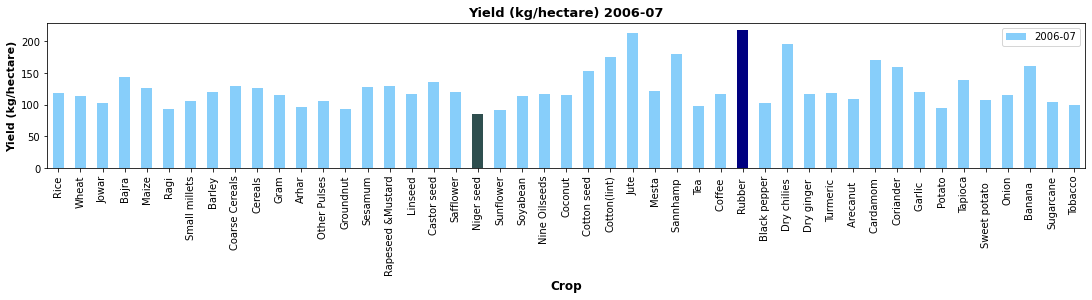

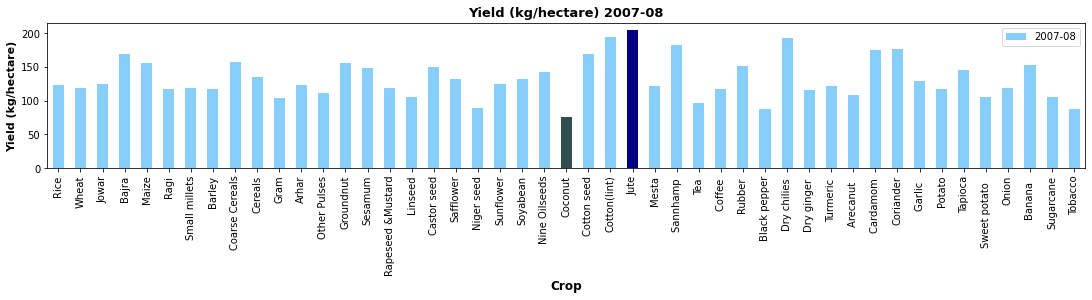

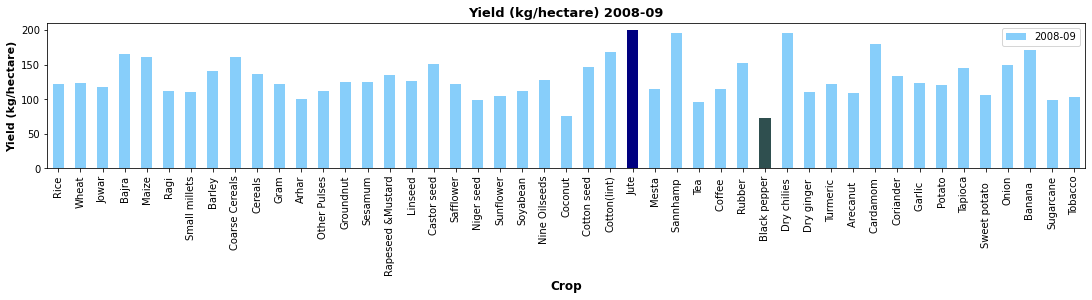

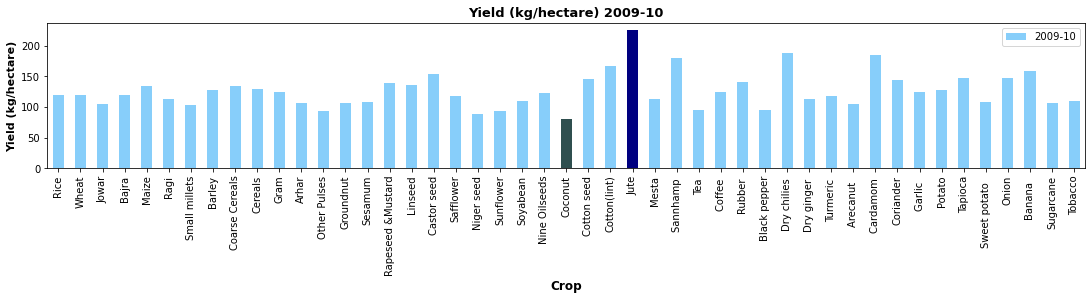

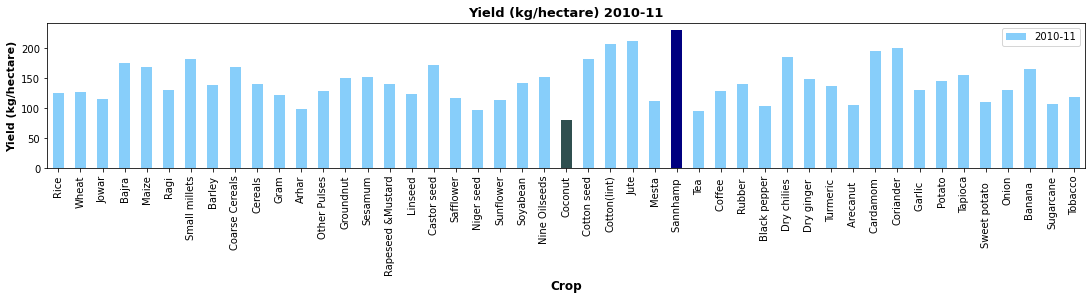

In [55]:
def set_custom_palette5(series, high_color='navy', other_color = 'lightskyblue', low_color='darkslategrey'):
    max_val = series.max()
    min_val = series.min()
    pal =[]
    
    for item in series:
        if item == max_val:
            pal.append(high_color)
        elif item == min_val:
            pal.append(low_color)
        else:
            pal.append(other_color)
    return pal

for i in range(1,6):
    plt.rcParams["figure.figsize"] = (15,4)
    high = np.array(crop_yield_year[crop_yield_year.columns[i]])
    crop_yield_year.plot.bar(crop_yield_year.columns[0], crop_yield_year.columns[i], color=set_custom_palette5(high))
    plt.ylabel('Yield (kg/hectare)', fontsize=11, fontweight='bold')
    plt.xlabel('Crop', fontsize=12, fontweight='bold')
    plt.title('Yield (kg/hectare) {}' .format(crop_yield_year.columns[i]), fontsize=13, fontweight='bold')
    plt.legend(loc=1)
    plt.tight_layout(pad=0.1)
    i+=1

**2006-07** Highest yield for Rubber and lowest yield for Niger seed

**2007-08** Highest yield for Jute and lowest yield for Coconut

**2008-09** Highest yield for Jute and lowest yield for Black pepper

**2009-10** Highest yield for Jute and lowest yield for Coconut

**2010-11** Highest yield for Sannhamp and lowest yield for Coconut

In [56]:
import jovian

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhakaremaithili/crop-cultivation-in-india" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhakaremaithili/crop-cultivation-in-india


'https://jovian.ai/bhakaremaithili/crop-cultivation-in-india'

## Conclusion:
India is expected to achieve the ambitious goal of doubling farm income by 2022. The agriculture sector in India is expected to generate better momentum in the next few years due to increased investment in agricultural infrastructure such as irrigation facilities, warehousing and cold storage. The growing use of genetically modified crops will likely improve the yield for Indian farmers. India is expected to be self-sufficient in pulses in the coming few years.
From the given data, we infer that:
1. Sugarcance owns 82.24% yield among major crops cultivated in India
2. State-wise distribution of yield for each crop is shown and State with maximum yield is determined
3. For each state, the crops with minimum cultivation cost, production cost and maximum yield are determined
4. The year wise distribution of area used for cultivation, crop production and yield of each crop is shown
5. The max and min area used for cultivation, crop production and yield of each crop is plotted year-wise and summarised below every graph

## Future Work
In past few years, global warming has affected the seasons in India. The latest data of past 10 years can be acquired and compare with the data presented above. We can analyse changing trends over 20 years due to changing season cycle and temperatures. This analysis will help us to predict the future trends. Also it will highlight the crops with decreasing yield and this work can be taken forward to agriculture labs to develop genetically modified crops that will survive in the present situation.

## References:

1. IBEF Agriculture in India: Information About Indian Agriculture & Its Importance
2. How to Create a Seaborn Palette That Highlights Maximum Value, by Samantha Knee Medium
3. Color Guide to Seaborn Palettes by MoJoMoonl, Medium
4. GeeksforGeeks | A computer science portal for geeks
5. Stack Overflow
6. kaggle.com